In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Load the dataset from a CSV file
data = pd.read_csv('Housing.csv')
print(data.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


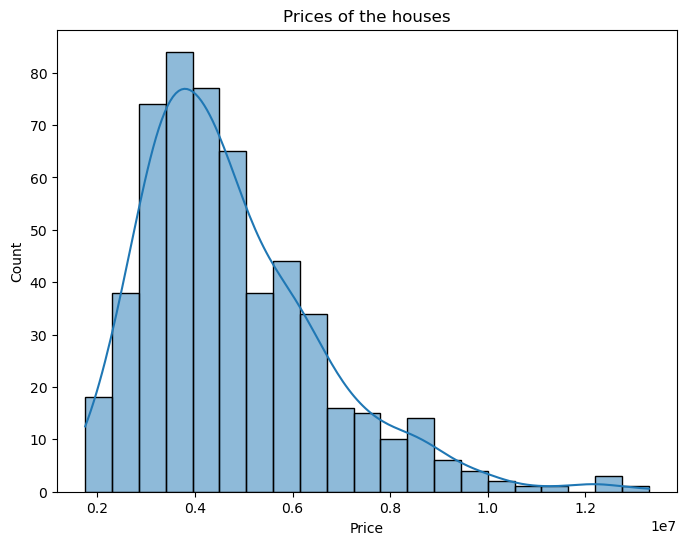

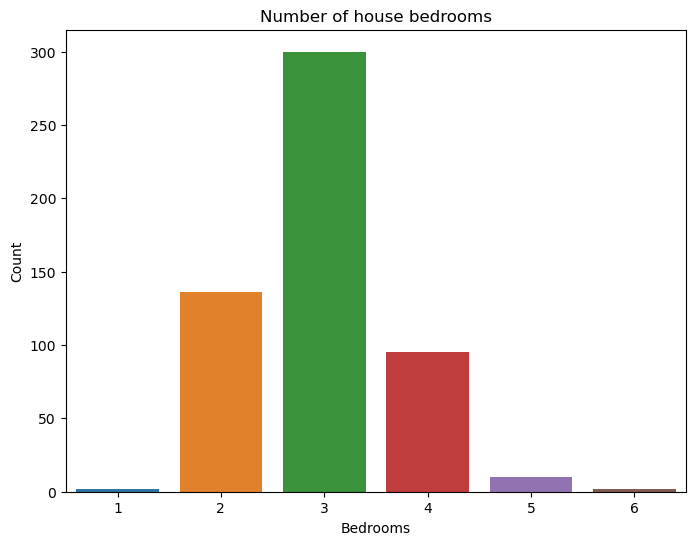

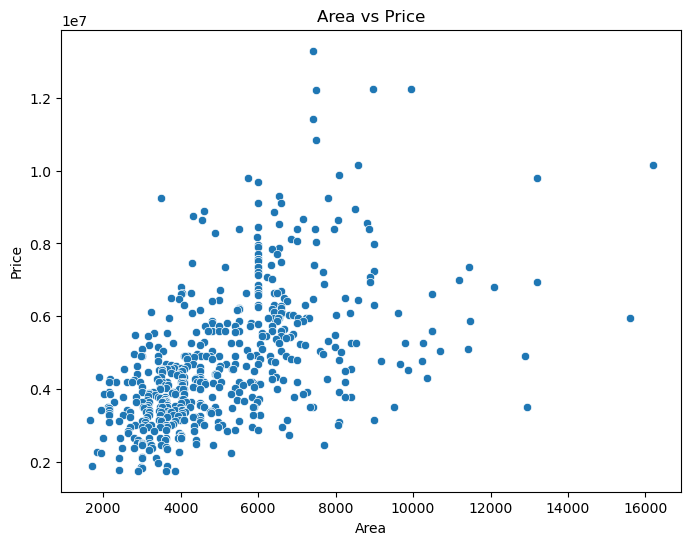

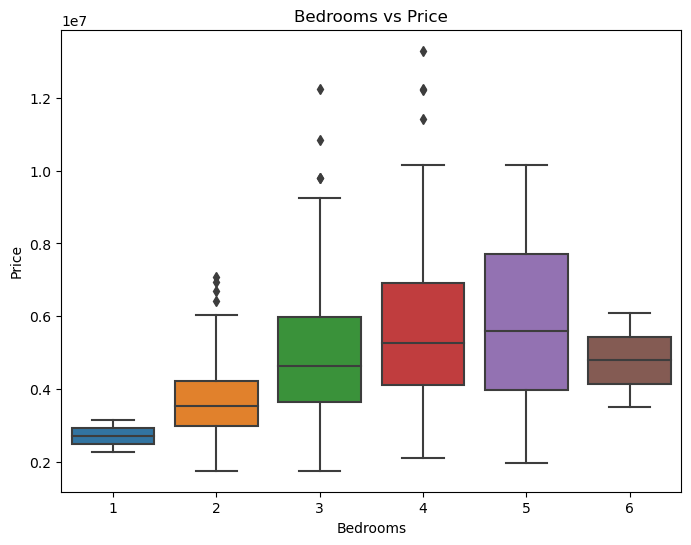

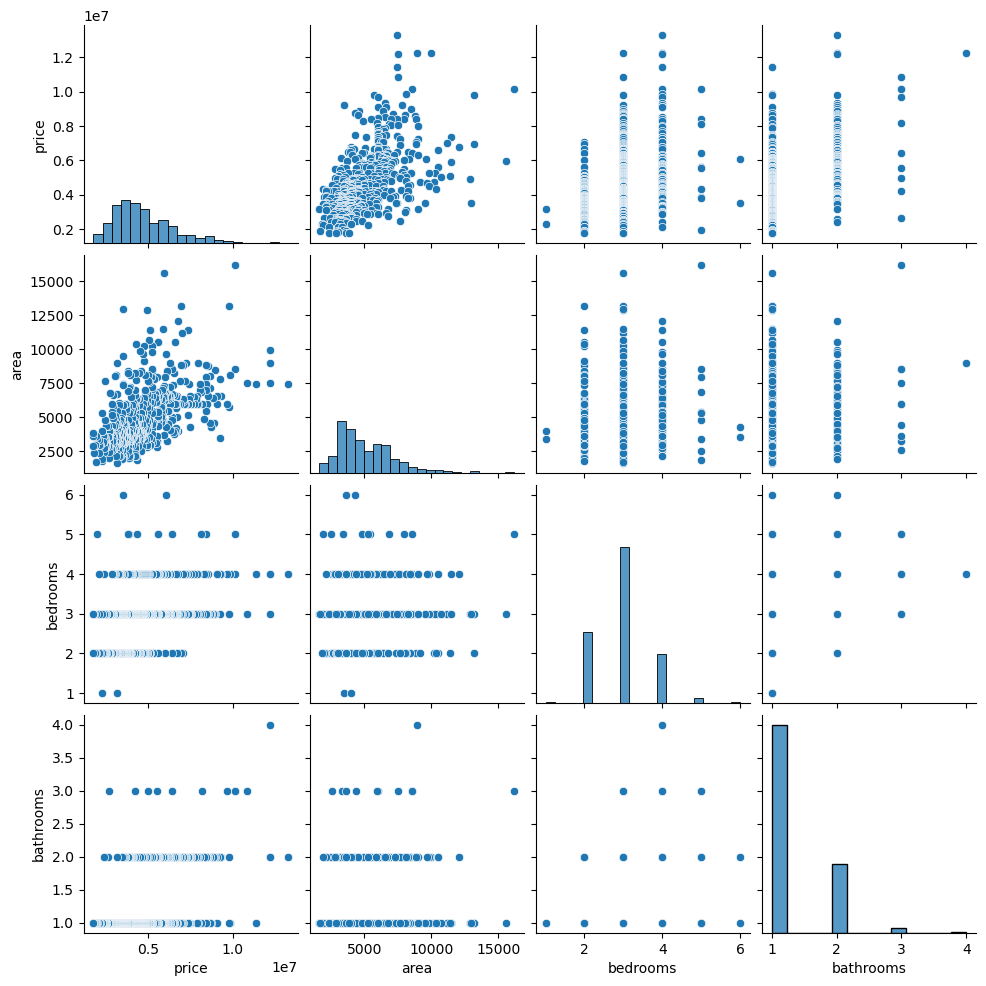

In [31]:

# Univariate Analysis
# Histogram of Price
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="price", kde=True)
plt.title("Prices of the houses")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

# Bar plot of Bedrooms
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="bedrooms")
plt.title("Number of house bedrooms")
plt.xlabel("Bedrooms")
plt.ylabel("Count")
plt.show()

# Bi-Variate Analysis
# Scatter plot of Area vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="area", y="price")
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")
plt.show()

# Box plot of Bedrooms vs Price
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="bedrooms", y="price")
plt.title("Bedrooms vs Price")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()

# Multi-Variate Analysis
# Pair plot of Price, Area, Bedrooms, and Bathrooms
sns.pairplot(data=data, vars=["price", "area", "bedrooms", "bathrooms"])
plt.show()


In [32]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Housing.csv")

# Perform descriptive statistics
statistics = data.describe()

# Print the statistics
print(statistics)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [33]:

# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Handle missing values
# Drop rows with missing values
data_cleaned = data.dropna()

# Verify if missing values have been handled
print("Columns with missing values after handling:")
print(data.isnull().sum())

Columns with missing values:
Series([], dtype: int64)
Columns with missing values after handling:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


In [34]:

# Define the outlier detection threshold
threshold = 1.5

# Find outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

outliers = ((data < lower_bound) | (data > upper_bound)).any(axis=1)

# Replace outliers with a suitable value
data[outliers] = np.nan  # Replace outliers with NaN or any other value

# Perform further data cleaning or imputation as needed

# Verify if outliers have been replaced
print("Number of outliers after replacement:", outliers.sum())

Number of outliers after replacement: 82


/var/folders/hl/2l628qvx623bkbb1lxctr_z80000gn/T/ipykernel_88089/708604616.py:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
/var/folders/hl/2l628qvx623bkbb1lxctr_z80000gn/T/ipykernel_88089/708604616.py:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
/var/folders/hl/2l628qvx623bkbb1lxctr_z80000gn/T/ipykernel_88089/708604616.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((data < lower_bound) | (data 

In [35]:

# Check for categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform encoding for categorical columns
for column in categorical_columns:
    data[column] = data[column].astype('category').cat.codes

# Print the updated dataset with encoded categorical columns
print(data)


         price    area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0          NaN     NaN       NaN        NaN      NaN        -1         -1   
1          NaN     NaN       NaN        NaN      NaN        -1         -1   
2          NaN     NaN       NaN        NaN      NaN        -1         -1   
3          NaN     NaN       NaN        NaN      NaN        -1         -1   
4          NaN     NaN       NaN        NaN      NaN        -1         -1   
..         ...     ...       ...        ...      ...       ...        ...   
540  1820000.0  3000.0       2.0        1.0      1.0         1          0   
541  1767150.0  2400.0       3.0        1.0      1.0         0          0   
542  1750000.0  3620.0       2.0        1.0      1.0         1          0   
543  1750000.0  2910.0       3.0        1.0      1.0         0          0   
544  1750000.0  3850.0       3.0        1.0      2.0         1          0   

     basement  hotwaterheating  airconditioning  parking  furnishingstatus 

In [53]:
#splitting dependent and independent variable
x=data.iloc[:,1:]
y=data.iloc[:,0]


In [54]:
names=x.columns

In [55]:
names

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking',
       'furnishingstatus'],
      dtype='object')

In [56]:
#Manual Encoding
x=np.where(x=='y',1,x)
x=np.where(x=='n',0,x)
x=np.where(x=='?',1,x)

/var/folders/hl/2l628qvx623bkbb1lxctr_z80000gn/T/ipykernel_88089/3158056508.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  x=np.where(x=='n',0,x)
/var/folders/hl/2l628qvx623bkbb1lxctr_z80000gn/T/ipykernel_88089/3158056508.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  x=np.where(x=='?',1,x)


In [57]:
x

array([[      nan,       nan,       nan, ..., -1.00e+00,       nan,
        -1.00e+00],
       [      nan,       nan,       nan, ..., -1.00e+00,       nan,
        -1.00e+00],
       [      nan,       nan,       nan, ..., -1.00e+00,       nan,
        -1.00e+00],
       ...,
       [ 3.62e+03,  2.00e+00,  1.00e+00, ...,  0.00e+00,  0.00e+00,
         2.00e+00],
       [ 2.91e+03,  3.00e+00,  1.00e+00, ...,  0.00e+00,  0.00e+00,
         0.00e+00],
       [ 3.85e+03,  3.00e+00,  1.00e+00, ...,  0.00e+00,  0.00e+00,
         2.00e+00]])

In [64]:
#Creating DataFrame
x=pd.DataFrame(x,columns=names)

In [65]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0
1,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0
2,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0
3,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0
4,NaN,NaN,NaN,NaN,-1.0,-1.0,-1.0,-1.0,-1.0,NaN,-1.0


In [66]:
x.describe()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
count,463.000000,463.000000,463.000000,463.000000,545.000000,545.000000,545.000000,545.000000,545.000000,463.000000,545.000000
mean,4766.583153,2.857451,1.220302,1.615551,0.565138,-0.005505,0.157798,-0.113761,0.078899,0.587473,0.796330
std,1795.315000,0.658924,0.440211,0.626901,0.740054,0.543990,0.659252,0.417773,0.611783,0.776003,1.023971
min,1650.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,3490.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4300.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6000.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000
max,10500.000000,4.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [58]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Scale the independent variables (X)
X_scaled = scaler.fit_transform(X)

# Print the scaled data
print(X_scaled)

[[        nan         nan         nan ... -1.76515302         nan
  -1.75589069]
 [        nan         nan         nan ... -1.76515302         nan
  -1.75589069]
 [        nan         nan         nan ... -1.76515302         nan
  -1.75589069]
 ...
 [-0.63934372 -1.30269706 -0.50098812 ... -0.12908432 -0.75786895
   1.17657231]
 [-1.03524527  0.21656928 -0.50098812 ... -0.12908432 -0.75786895
  -0.77840302]
 [-0.51109393  0.21656928 -0.50098812 ... -0.12908432 -0.75786895
   1.17657231]]


In [72]:
#Data Splitting into train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [73]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [74]:
#Train the model
nb.fit(x_train,y_train)

ValueError: Input y contains NaN.

In [75]:
#test the model
pred=nb.predict(x_test)

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [76]:
pred

NameError: name 'pred' is not defined

In [77]:
# Evaluate the Model performance
from sklearn import metrics

In [78]:
metrics.confusion_matrix(y_test,pred)

NameError: name 'pred' is not defined

In [80]:
print(metrics.classification_report(y_test,pred))

NameError: name 'pred' is not defined